
# Introduction à l'Analyse des Séries Temporelles

Les séries temporelles se réfèrent à une séquence de points de données collectés ou enregistrés à des intervalles ordonnés dans le temps.
Ce notebook explore diverses techniques pour analyser, prétraiter et modéliser des séries temporelles.

Nous aborderons :
- Les méthodes de prévision simples.
- Des techniques avancées telles que la différenciation et les moyennes mobiles.
- Les modèles de Deep Learning pour la prévision des séries temporelles (par exemple, Single Layer Neural Networks, Deep Neural Networks).

**Applications** : L'analyse des séries temporelles est largement utilisée dans des domaines tels que la finance, la modélisation climatique, la prévision des ventes, etc.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



# Génération de la série temporelle saisonnière avec tendance et bruit

Dans le code ci-dessous nous allons configurer la série temporelle avec la saisonnalité, la tendance et un peu de bruit.


### Explications

1. **Tendance (Trend)** :
   - La tendance représente le comportement général ou la direction globale de la série temporelle sur une période donnée.
   - Exemple : Une augmentation progressive des ventes au fil des années.

2. **Saisonnalité (Seasonality)** :
   - La saisonnalité reflète des variations périodiques et récurrentes dues à des facteurs saisonniers ou calendaires.
   - Exemple : Une augmentation des ventes de glaces pendant l'été ou une hausse de la demande d'électricité en hiver.

3. **Bruit (Noise)** :
   - Le bruit est constitué de fluctuations aléatoires ou imprévues qui n'ont pas de schéma clair.
   - Exemple : Des variations irrégulières dans les données de ventes en raison de promotions ponctuelles.

Dans le code suivant :
- Nous simulons une série temporelle en combinant une composante de tendance linéaire, une composante saisonnière périodique (basée sur une fonction sinus), et un bruit aléatoire pour imiter des variations imprévues.
- Ces composantes sont ensuite additionnées pour produire une série temporelle réaliste à analyser.


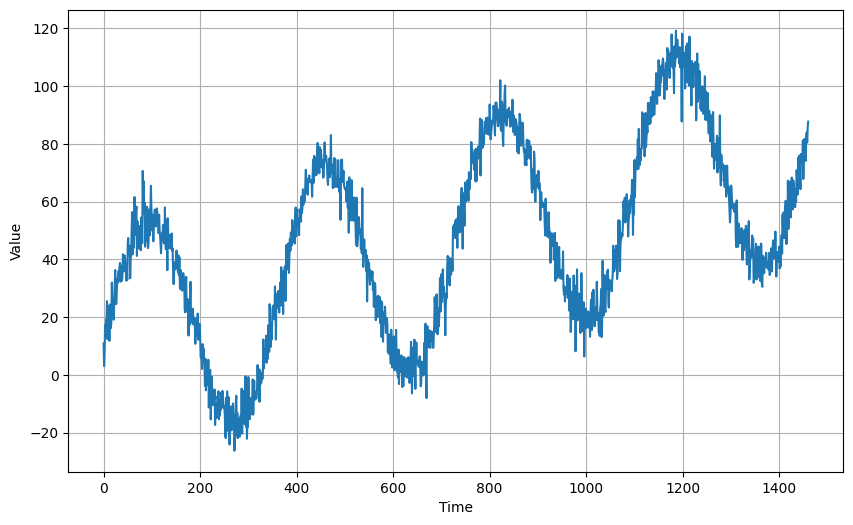

In [ ]:

# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


# Définition mise à jour de plot_series
def plot_series(time, series, format="-", start=0, end=None, label=None):
    '''
    Fonction pour tracer une série temporelle.
    - time : les valeurs de temps.
    - series : les données de la série temporelle.
    - format : le style de la ligne (défaut : '-').
    - start, end : plage des indices de temps à tracer.
    - label : étiquette pour la légende.
    '''
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")  # Étiquetage de l'axe des temps
    plt.ylabel("Value")  # Étiquetage de l'axe des valeurs
    plt.grid(True)  # Ajout de la grille pour améliorer la lisibilité


# Définition des paramètres de la série temporelle
time = np.arange(4 * 365 + 1)  # Génération de 4 années de données (365 jours par an)
baseline = 10  # Valeur de base pour la série
amplitude = 40  # Amplitude de la composante saisonnière
slope = 0.05  # Pente pour la tendance
noise_level = 5  # Niveau de bruit aléatoire

# Création de la composante de tendance
series = baseline + slope * time  # Ajout de la tendance linéaire

# Ajout de la composante saisonnière
series += amplitude * np.sin(time / 365 * 2 * np.pi)  # Saison répétée tous les 365 jours

# Ajout de la composante de bruit
series += np.random.normal(scale=noise_level, size=len(time))  # Bruit aléatoire avec une distribution normale

# Affichage de la série temporelle générée
plt.figure(figsize=(10, 6))  # Définition de la taille du graphique
plot_series(time, series)  # Traçage de la série
plt.show()  # Affichage du graphique



### Interprétation de la série temporelle

La série générée combine trois composantes principales : **tendance**, **saisonnalité**, et **bruit**. Ces éléments reflètent des caractéristiques réalistes souvent rencontrées dans les séries temporelles du monde réel.

1. **Tendance (Trend)** :
   - La composante linéaire (basée sur `baseline` et `slope`) indique une **croissance régulière** sur la période de temps simulée.
   - Exemple : Une augmentation constante des ventes d'un produit au fil des années en raison de sa popularité croissante.

2. **Saisonnalité (Seasonality)** :
   - La saisonnalité introduite par la fonction sinus (`amplitude * np.sin(...)`) représente un **schéma récurrent annuel**.
   - Exemple : Dans un contexte commercial, cela pourrait correspondre à des hausses de ventes saisonnières, comme des pics en été pour des produits liés aux vacances ou en hiver pour les produits liés aux fêtes de fin d’année.

3. **Bruit (Noise)** :
   - Le bruit aléatoire ajouté à la série reflète des **variations imprévues ou irrégulières**, modélisant des facteurs externes qui ne suivent pas un schéma prévisible.
   - Exemple : Promotions imprévues, conditions économiques fluctuantes, ou événements inhabituels (comme des pannes ou des retards).

### Application Pratique
Cette série peut être utilisée comme un **jeu de données d'entraînement** pour tester différentes techniques de prévision et de modélisation, telles que :
   - Moyenne mobile pour lisser le bruit.
   - Modèles de Machine Learning ou Deep Learning pour capturer la tendance et la saisonnalité.

Elle permet également de **tester les limites des algorithmes**, en observant leur capacité à gérer à la fois des motifs périodiques et des perturbations aléatoires.






Maintenant que nous avons la série temporelle, divisons-la afin de pouvoir commencer à faire des prévisions


### Analyse exploratoire de la série temporelle

Avant d'appliquer des méthodes de prévision, nous allons effectuer une analyse exploratoire pour mieux comprendre notre série.

#### A. Visualisation globale
Nous observerons la série pour identifier les motifs de tendance, saisonnalité, et bruit.

#### B. Statistiques descriptives
Nous calculerons les mesures statistiques principales, comme :
- Moyenne, médiane, écart-type.
- Minima et maxima.

#### C. Distribution des valeurs
Nous analyserons la distribution des valeurs pour détecter des anomalies ou des biais.

#### D. Analyse de stationnarité
Nous effectuerons un test de stationnarité (par exemple, Dickey-Fuller Augmenté) et examinerons l'autocorrélation.

#### E. Décomposition de la série temporelle
Nous décomposerons la série en ses composantes principales : tendance, saisonnalité, et résidus.


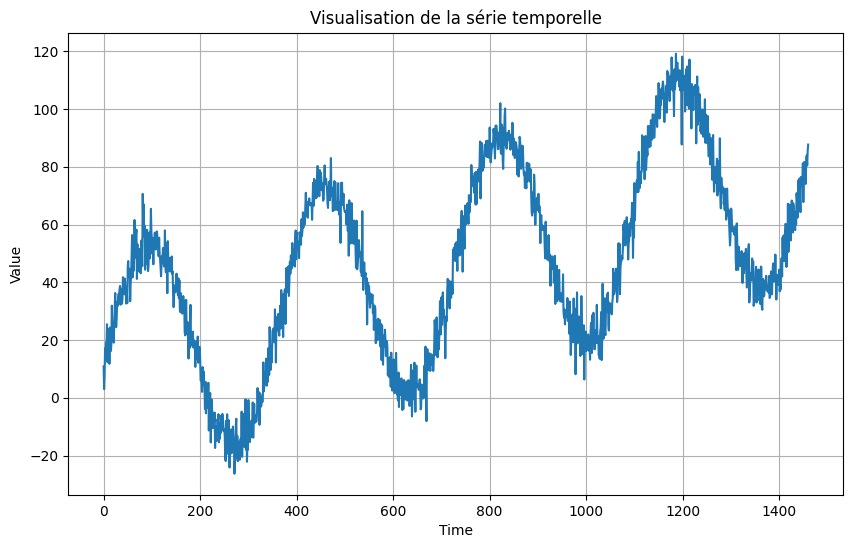

In [ ]:

# A. Visualisation globale
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.title("Visualisation de la série temporelle")
plt.show()


In [ ]:

# B. Statistiques descriptives
print("Moyenne :", np.mean(series))
print("Médiane :", np.median(series))
print("Écart-type :", np.std(series))
print("Valeur minimale :", np.min(series))
print("Valeur maximale :", np.max(series))


Moyenne : 46.602078318701004
Médiane : 45.759843109260665
Écart-type : 32.30221172091135
Valeur minimale : -26.30060838344081
Valeur maximale : 119.18858240540479


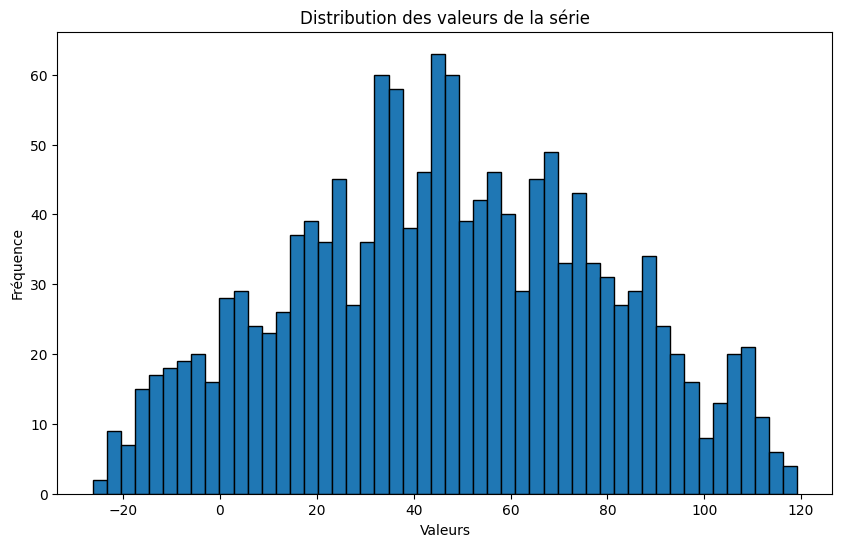

In [ ]:

# C. Distribution des valeurs
plt.figure(figsize=(10, 6))
plt.hist(series, bins=50, edgecolor='k')
plt.title("Distribution des valeurs de la série")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.show()


In [ ]:

# D. Analyse de stationnarité
from statsmodels.tsa.stattools import adfuller

result = adfuller(series)
print("Statistique de test ADF :", result[0])
print("p-valeur :", result[1])
if result[1] < 0.05:
    print("La série est stationnaire (p-valeur < 0.05).")
else:
    print("La série n'est pas stationnaire (p-valeur >= 0.05).")


Statistique de test ADF : -2.611013824065002
p-valeur : 0.09074223275996501
La série n'est pas stationnaire (p-valeur >= 0.05).


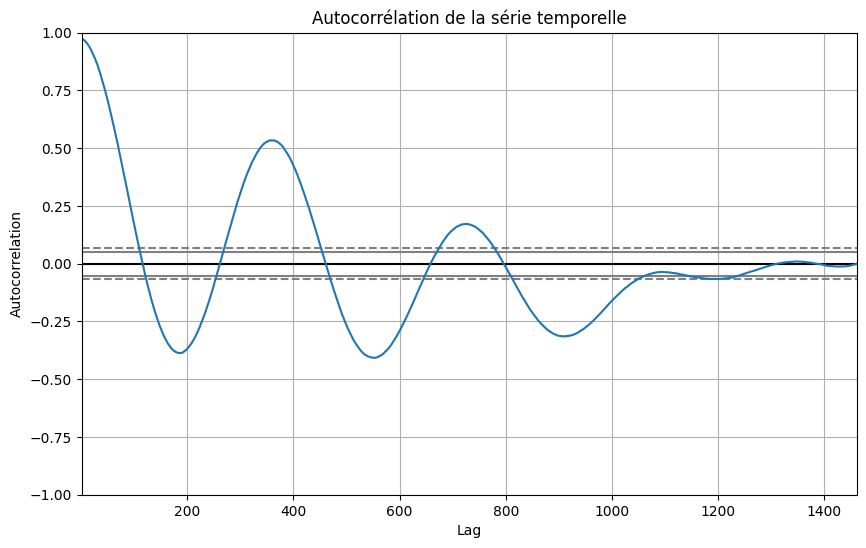

In [ ]:

# Autocorrélation
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(series)
plt.title("Autocorrélation de la série temporelle")
plt.show()


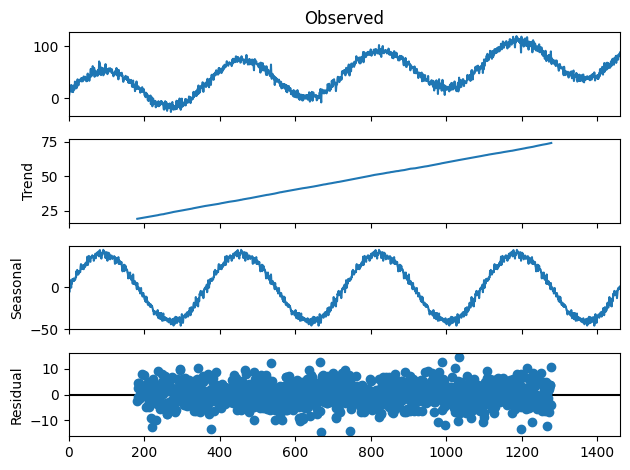

In [ ]:

# E. Décomposition de la série temporelle
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(series, period=365, model='additive')
result.plot()
plt.show()


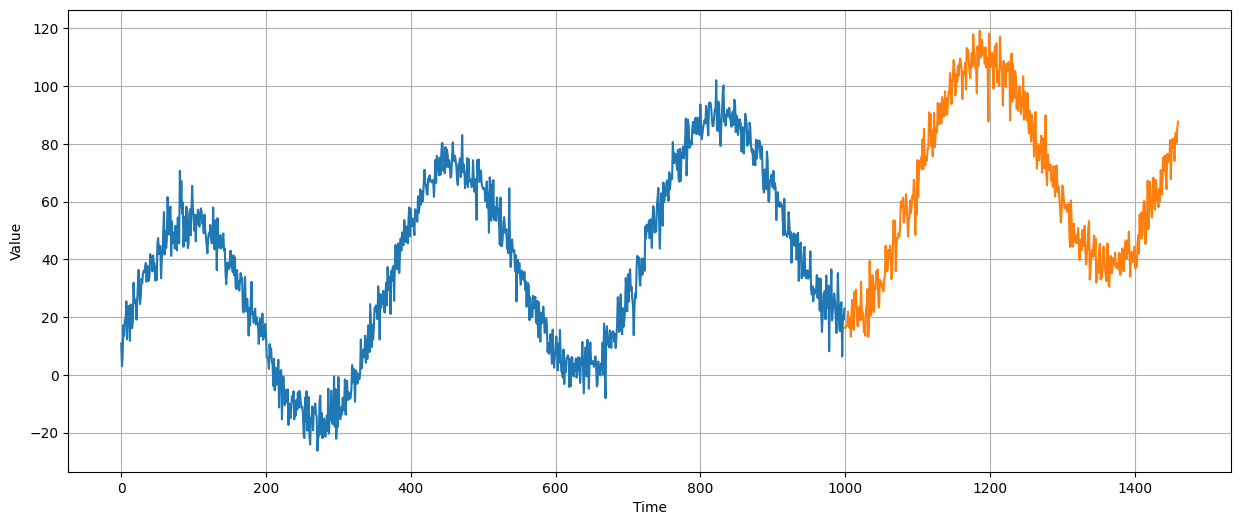

In [ ]:
split_time = 1000

# Training set
time_train = time[:split_time]
x_train = series[:split_time]

# Validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

# Dessin
plt.figure(figsize=(15, 6))
plot_series(time_train, x_train)

plot_series(time_valid, x_valid)
plt.show()


### Prévision naïve (Naive Forecasting)

La prévision naïve est une méthode de base pour la prévision des séries temporelles. Dans cette approche :
- La valeur prédite pour un point temporel est simplement la dernière valeur observée.
- Cette méthode est simple mais constitue une **baseline** utile pour comparer des modèles plus complexes.

#### Applications
La prévision naïve est pertinente dans des contextes où les données sont fortement autocorrélées à court terme.

#### Limites
- Ne prend pas en compte les tendances ou la saisonnalité.
- Très sensible au bruit et aux variations aléatoires.

Nous allons implémenter cette méthode et visualiser ses performances sur notre série temporelle.


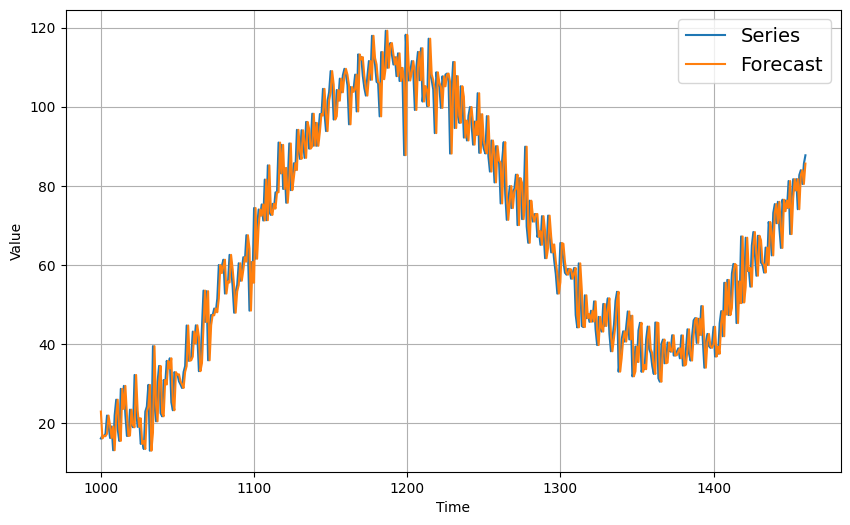

In [ ]:

# Prévision naïve
naive_forecast = series[split_time - 1:-1]

# Dessin
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label="Forecast")
plt.legend(fontsize=14)
plt.show()



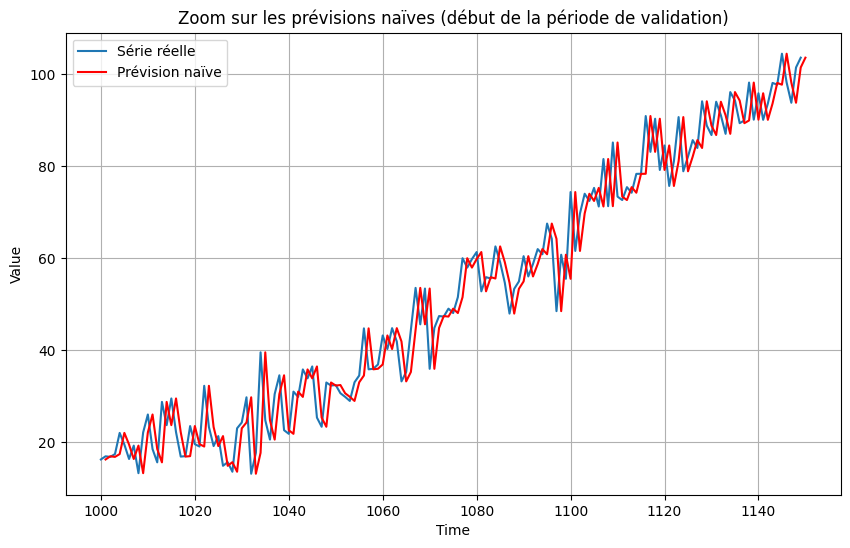

In [ ]:

# Zoom sur le début de la période de validation pour observer les différences
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150, label="Série réelle")
plot_series(time_valid, naive_forecast, start=1, end=151, label="Prévision naïve", format='r')
plt.title("Zoom sur les prévisions naïves (début de la période de validation)")
plt.legend()
plt.show()



### Analyse des erreurs de la prévision naïve

Nous évaluons les performances de cette méthode en calculant les erreurs suivantes :
- **MSE (Mean Squared Error)** : Mesure l'erreur quadratique moyenne.
- **MAE (Mean Absolute Error)** : Mesure l'erreur absolue moyenne.

Ces métriques permettront de comparer cette méthode aux modèles plus avancés.


In [ ]:
# Calcul des erreurs pour la prévision naïve avec TensorFlow
mse_naive = tf.reduce_mean(tf.square(x_valid - naive_forecast)).numpy()  # Mean Squared Error
mae_naive = tf.reduce_mean(tf.abs(x_valid - naive_forecast)).numpy()    # Mean Absolute Error

print("Erreur MSE pour la prévision naïve :", mse_naive)
print("Erreur MAE pour la prévision naïve :", mae_naive)


Erreur MSE pour la prévision naïve : 50.63184811994348
Erreur MAE pour la prévision naïve : 5.608339833047946


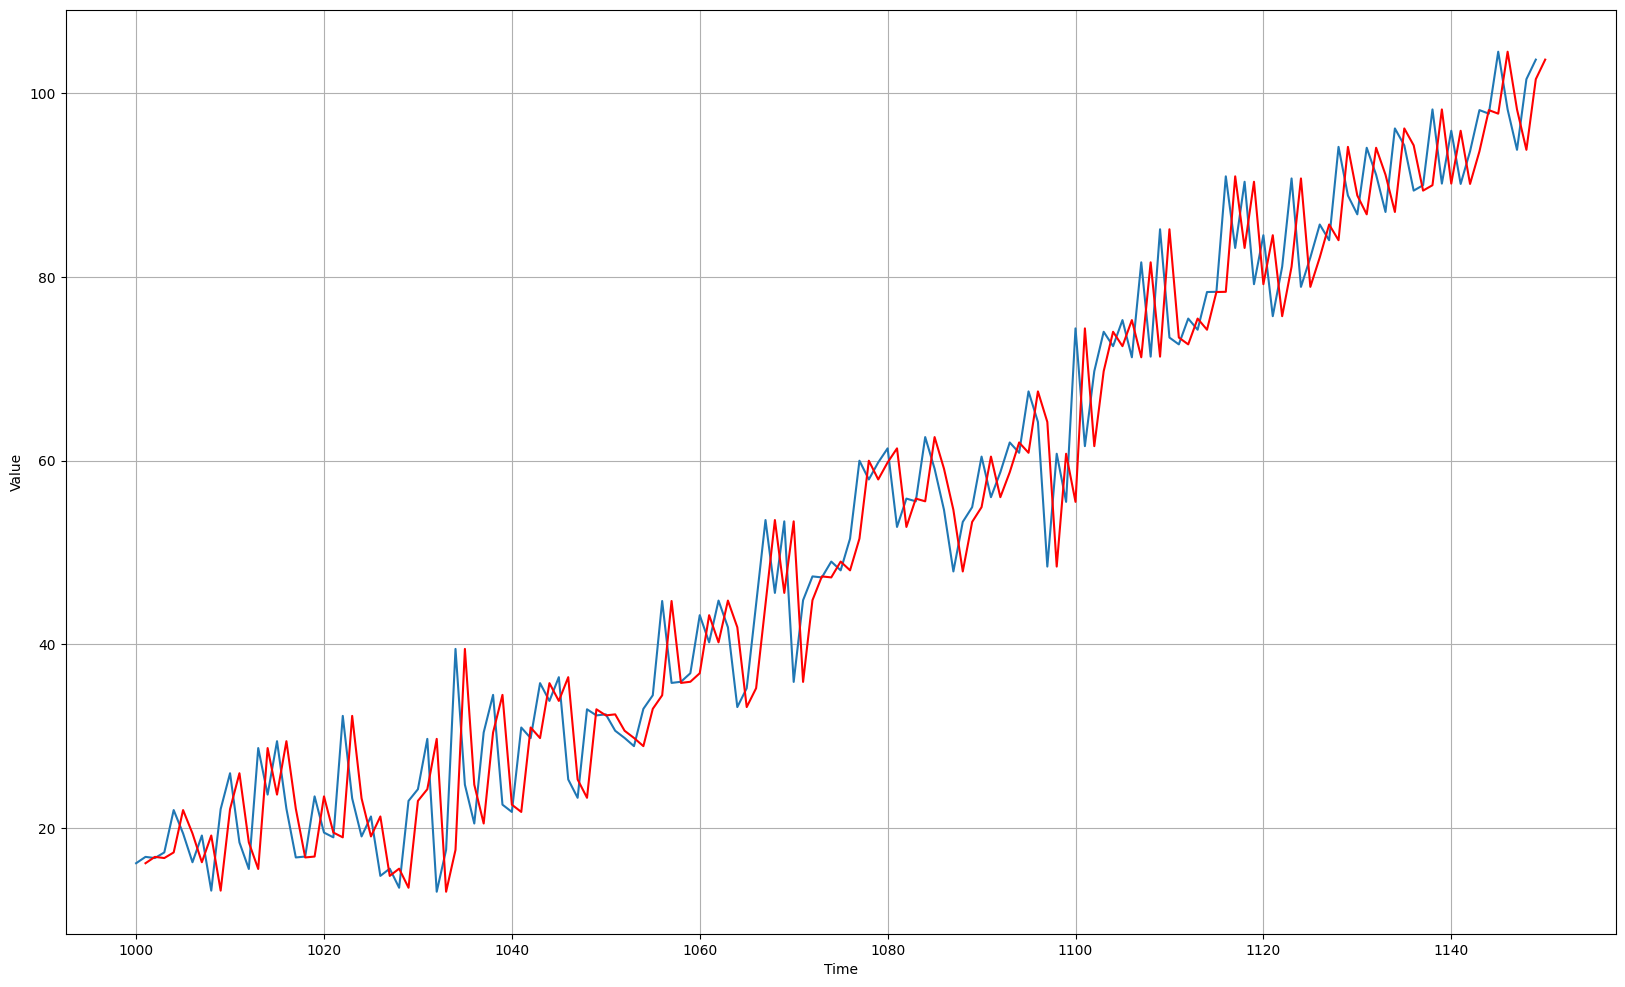

In [ ]:
plt.figure(figsize=(20, 12))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, 'r', start=1, end=151)

### On peut voir que la prévision naïve est en retard d'un cran par rapport à la série chronologique.

# Erreur du modèle naïf (Naive forecast)

### CRappelons maintenant l'erreur quadratique moyenne et l'erreur absolue moyenne entre les prévisions et les prévisions dans la période de validation :

In [ ]:
print("Erreur MSE pour la prévision naïve :", mse_naive)
print("Erreur MAE pour la prévision naïve :", mae_naive)

Erreur MSE pour la prévision naïve : 50.63184811994348
Erreur MAE pour la prévision naïve : 5.608339833047946


Cette prévision sera notre base de comparaison (baseline), essayons maintenant une moyenne mobile :


## Méthode de la Moyenne Mobile (Moving Average)

Une moyenne mobile lisse une série temporelle en moyennant les valeurs sur une fenêtre glissante de taille fixe.
Cette méthode est utile pour réduire le bruit, mais elle ne tient pas compte de la saisonnalité ou des tendances sans étapes de prétraitement comme la différenciation.


# Méthode de la Moyenne mobile      (Moving Average / window averaging)

In [ ]:
def moving_average_forecast(series, window_size):
  """Prévoire la moyenne des dernières valeurs.
      Si window_size=1, cela équivaut à une prévision naïve"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

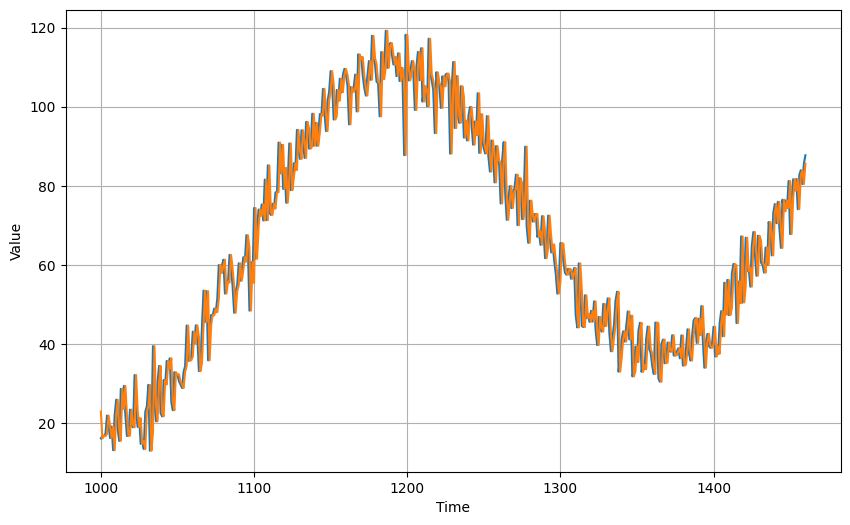

In [ ]:
moving_avg = moving_average_forecast(series,1)[split_time - 1:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

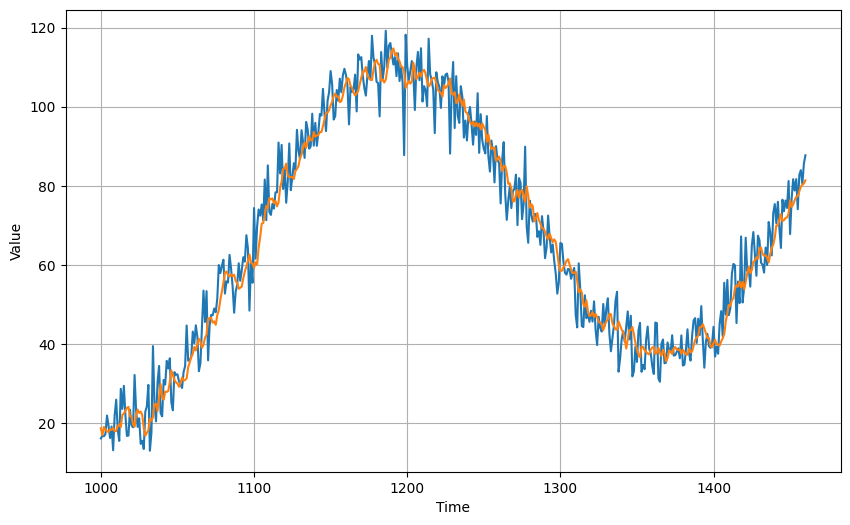

In [ ]:
moving_avg = moving_average_forecast(series,5)[split_time - 5:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

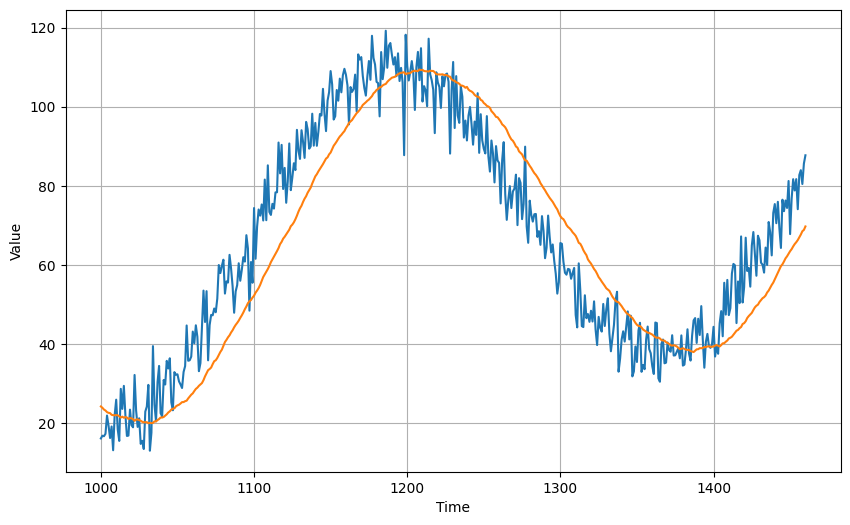

In [ ]:
moving_avg = moving_average_forecast(series,40)[split_time - 40:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [ ]:
# Calcul des erreurs pour la prévision naïve avec TensorFlow
mse_average = tf.reduce_mean(tf.square(x_valid - moving_avg)).numpy()  # Mean Squared Error
mae_average = tf.reduce_mean(tf.abs(x_valid - moving_avg)).numpy()    # Mean Absolute Error
print("Erreur MSE pour le moving average :", mse_average)
print("Erreur MAE pour le moving average :", mae_average)

Erreur MSE pour le moving average : 127.47199261407384
Erreur MAE pour le moving average : 9.55052175765944


###C'est pire que les prévisions naïves ! La moyenne mobile n'anticipe pas la tendance ou la saisonnalité, essayons donc de les supprimer en utilisant la différenciation.


## Différenciation et Stationnarité

De nombreux modèles de séries temporelles supposent que les données sont stationnaires, c'est-à-dire que leurs propriétés statistiques (moyenne, variance) ne changent pas au cours du temps.
La différenciation est une technique permettant de supprimer les tendances et la saisonnalité, transformant ainsi une série en une série stationnaire.


# Différenciation

###Puisque la période de saisonnalité est de 365 jours, nous soustrairons la valeur à l'instant *t* – 365 de la valeur à l'instant *t*.

###Le but est de supprimer la tendance et la saisonnalité puisque la moyenne mobile ne les voit pas!

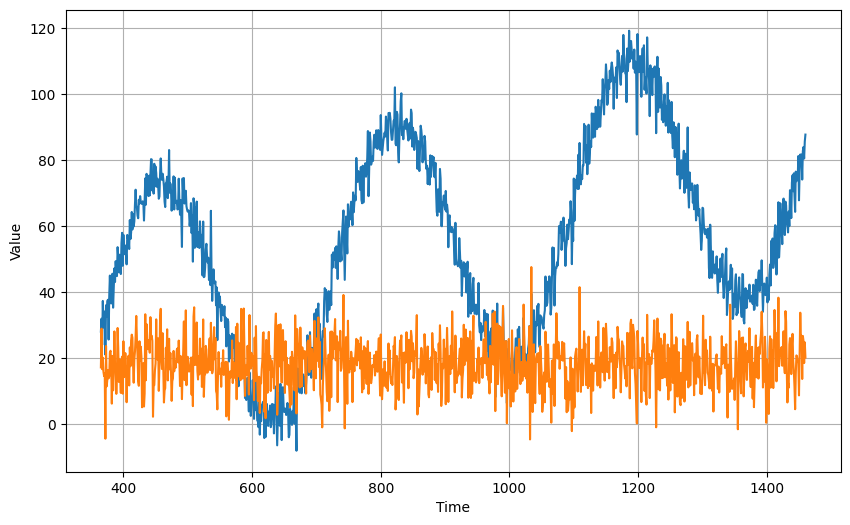

In [ ]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))

plot_series(diff_time, series[365:])

plot_series(diff_time, diff_series)

plt.show()

###La tendance et la saisonnalité semblent avoir disparu. Donc, maintenant, nous pouvons utiliser la moyenne mobile:

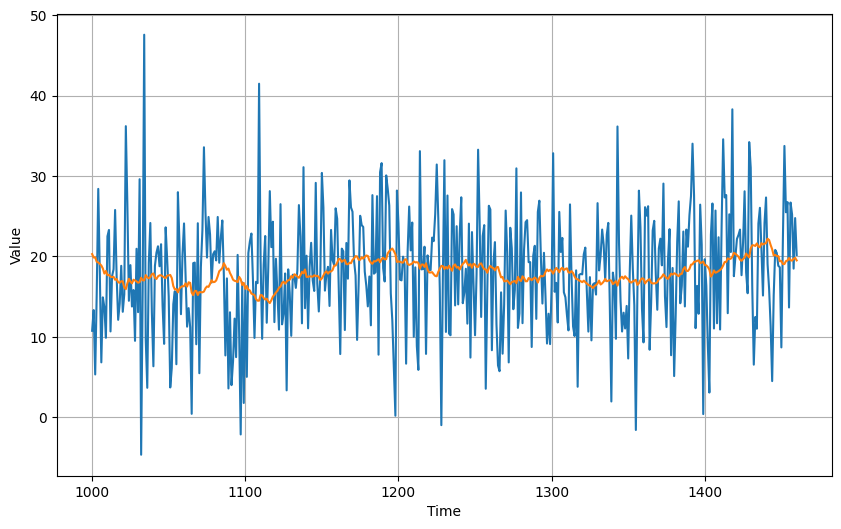

In [ ]:
diff_moving_avg = moving_average_forecast(diff_series, 30)[split_time - 365 - 30:]


plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])

#plot_series(time_valid, x_valid)

plot_series(time_valid, diff_moving_avg)
plt.show()

### Ramenons, maintenant, la tendance et la saisonnalité qu'on avait supprimées en **ajoutant les valeurs passées de t à 365**:

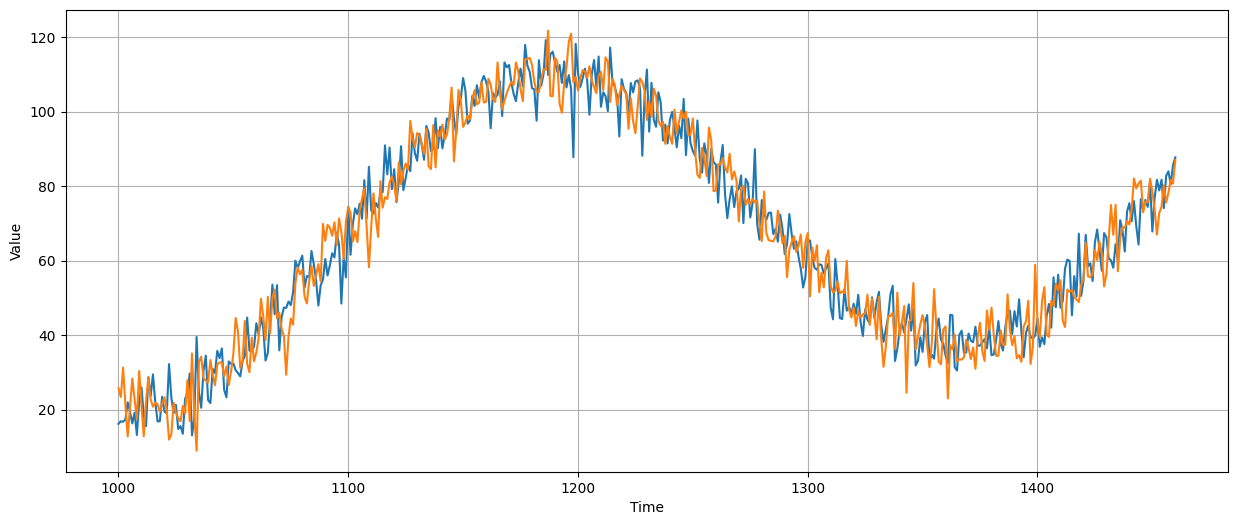

In [ ]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(15, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [ ]:
# Calcul des erreurs pour la prévision moving average avec differenciation
mse_average = tf.reduce_mean(tf.square(x_valid - diff_moving_avg_plus_past)).numpy()  # Mean Squared Error
mae_average = tf.reduce_mean(tf.abs(x_valid - diff_moving_avg_plus_past)).numpy()    # Mean Absolute Error
print("Erreur MSE pour le moving average avec diff :", mse_average)
print("Erreur MAE pour le moving average avec diff:", mae_average)




Erreur MSE pour le moving average avec diff : 56.86992462603018
Erreur MAE pour le moving average avec diff: 5.960844946943034


###Mieux que des prévisions naïves.

###Cependant, les prévisions semblent un peu trop aléatoires, car nous ne faisons qu'ajouter des valeurs passées, qui étaient bruyantes.

###Utilisons une moyenne mobile sur les valeurs passées pour supprimer une partie du bruit :

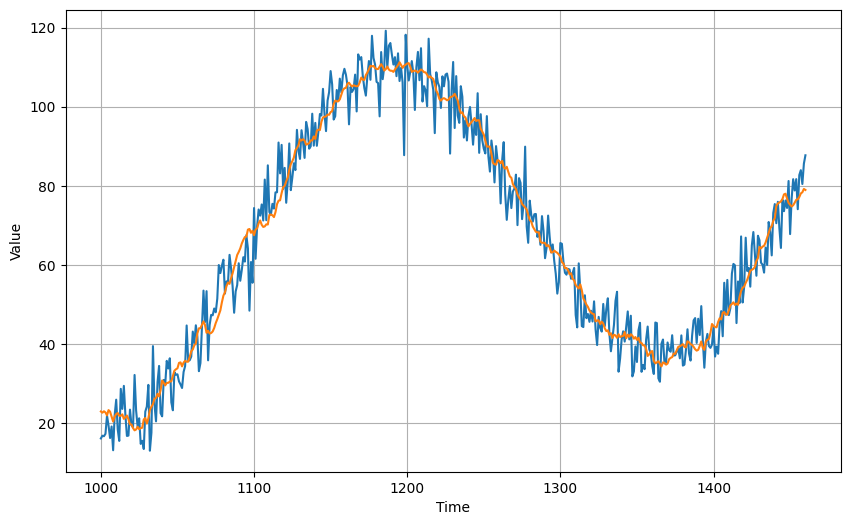

In [ ]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [ ]:
# Calcul des erreurs pour la prévision moving average avec differenciation + smooth_past
mse_average = tf.reduce_mean(tf.square(x_valid - diff_moving_avg_plus_smooth_past)).numpy()  # Mean Squared Error
mae_average = tf.reduce_mean(tf.abs(x_valid - diff_moving_avg_plus_smooth_past)).numpy()    # Mean Absolute Error
print("Erreur MSE pour le moving average avec diff +smooth_past :", mse_average)
print("Erreur MAE pour le moving average avec diff+smooth_past:", mae_average)


Erreur MSE pour le moving average avec diff +smooth_past : 31.45456464747108
Erreur MAE pour le moving average avec diff+smooth_past: 4.439654695009395


## Petite Intro tf.data

### Introduction à `tf.data`

La bibliothèque `tf.data` est une API de TensorFlow conçue pour créer des pipelines de données efficaces. Elle permet de :
- Charger et prétraiter des données volumineuses.
- Optimiser les performances en transmettant efficacement les données à un modèle.

Dans les cellules suivantes, nous explorons plusieurs fonctionnalités de `tf.data`.

#### Concepts clés :
1. **Dataset** : Représente une collection de données.
2. **Transformation** : Les données peuvent être transformées (par exemple, groupées, mélangées, fenêtrées).
3. **Pipeline** : Les transformations peuvent être enchaînées pour créer un flux de données.

Les exemples incluent la création de datasets simples et leur manipulation pour des cas d'utilisation typiques.
"""

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.17.1


In [ ]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
   print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [ ]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
   print('val', val, 'val.numpy',val.numpy())

val tf.Tensor(0, shape=(), dtype=int64) val.numpy 0
val tf.Tensor(1, shape=(), dtype=int64) val.numpy 1
val tf.Tensor(2, shape=(), dtype=int64) val.numpy 2
val tf.Tensor(3, shape=(), dtype=int64) val.numpy 3
val tf.Tensor(4, shape=(), dtype=int64) val.numpy 4
val tf.Tensor(5, shape=(), dtype=int64) val.numpy 5
val tf.Tensor(6, shape=(), dtype=int64) val.numpy 6
val tf.Tensor(7, shape=(), dtype=int64) val.numpy 7
val tf.Tensor(8, shape=(), dtype=int64) val.numpy 8
val tf.Tensor(9, shape=(), dtype=int64) val.numpy 9


In [ ]:
dataset

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(1, shift=1)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 
1 
2 
3 
4 
5 
6 
7 
8 
9 


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(7, shift=1, drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 5 6 
1 2 3 4 5 6 7 
2 3 4 5 6 7 8 
3 4 5 6 7 8 9 


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(8, shift=1, drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 5 6 7 
1 2 3 4 5 6 7 8 
2 3 4 5 6 7 8 9 


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(6, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(6))
for window in dataset:
  print(window.numpy())


[0 1 2 3 4 5]
[1 2 3 4 5 6]
[2 3 4 5 6 7]
[3 4 5 6 7 8]
[4 5 6 7 8 9]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
  print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [ ]:
for x,y in dataset:
  print(x, y)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64) tf.Tensor([4], shape=(1,), dtype=int64)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int64) tf.Tensor([5], shape=(1,), dtype=int64)
tf.Tensor([2 3 4 5], shape=(4,), dtype=int64) tf.Tensor([6], shape=(1,), dtype=int64)
tf.Tensor([3 4 5 6], shape=(4,), dtype=int64) tf.Tensor([7], shape=(1,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64) tf.Tensor([8], shape=(1,), dtype=int64)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int64) tf.Tensor([9], shape=(1,), dtype=int64)


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
  print(x.numpy(), y.numpy())


[0 1 2 3] [4]
[1 2 3 4] [5]
[3 4 5 6] [7]
[5 6 7 8] [9]
[4 5 6 7] [8]
[2 3 4 5] [6]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())


x =  [[1 2 3 4]
 [2 3 4 5]]
y =  [[5]
 [6]]
x =  [[4 5 6 7]
 [3 4 5 6]]
y =  [[8]
 [7]]
x =  [[0 1 2 3]
 [5 6 7 8]]
y =  [[4]
 [9]]


## Réseaux de neurones

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
from tensorflow import keras

2.17.1


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Juste un pattern arbitraire, qu'on peut changer par ce que l'on veut"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repéter le même pattern à chaque période"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


#   les paramètres de la série

time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
noise_level = 5


# Créer la série temporelle
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Updater la série avec le bruit
series += noise(time, noise_level, seed=42)

# On règle le setup de la prédiction de la série temporelle

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000




In [ ]:
def windowed_dataset(series, window_size, batch_size=32, shuffle_buffer=1000):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset



# Le modèle linéaire (1 seule couche NN)

In [ ]:
# Création du modèle avec une seule couche Dense
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(window_size,)),  # Définir la taille d'entrée
    tf.keras.layers.Dense(1)                     # Une seule couche dense
])

# Préparation des datasets fenêtrés
train_set = windowed_dataset(x_train, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# Configuration de l'optimiseur, de la fonction de perte et des métriques
optimizer = keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Callback pour un arrêt précoce en cas de non-amélioration
early_stopping = keras.callbacks.EarlyStopping(patience=10)

# Entraînement du modèle
history = model.fit(train_set, epochs=500,
                    validation_data=valid_set,
                    callbacks=[early_stopping])


Epoch 1/500
     31/Unknown 1s 6ms/step - loss: 50.4506 - mae: 50.9496  

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 49.9129 - mae: 50.4119 - val_loss: 22.0396 - val_mae: 22.5391
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.2128 - mae: 9.7042 - val_loss: 8.1881 - val_mae: 8.6795
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3302 - mae: 7.8147 - val_loss: 7.3975 - val_mae: 7.8823
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2182 - mae: 7.7035 - val_loss: 7.1403 - val_mae: 7.6223
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7040 - mae: 7.1926 - val_loss: 6.6535 - val_mae: 7.1324
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7003 - mae: 7.1874 - val_loss: 6.5730 - val_mae: 7.0611
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7409 - mae: 7.2248 - val_loss: 6.6678 - val_mae: 7.1498
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4971 - mae: 6.9787 - val_loss: 6.4993 - val_mae: 6.9890
Epoch 9/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7975 - mae

In [ ]:
#print("Layer weights {}".format(l0.get_weights()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

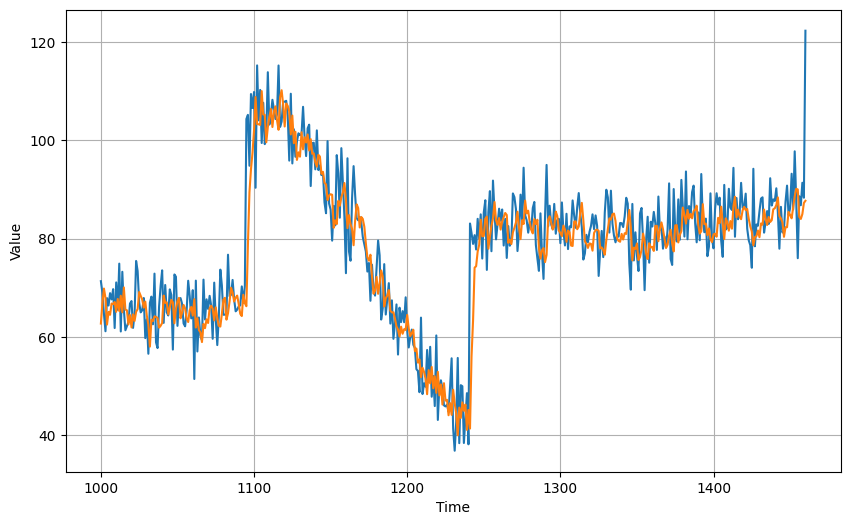

In [ ]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:

# Calcul de MSE
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(x_valid, results)  # Mise à jour avec les données
mse = mse_metric.result().numpy()  # Récupération du résultat
print("Erreur MSE :", mse)

# Calcul de MAE
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(x_valid, results)  # Mise à jour avec les données
mae = mae_metric.result().numpy()  # Récupération du résultat
print("Erreur MAE :", mae)


Erreur MSE : 46.990433
Erreur MAE : 4.9742103


# Recherchons le meilleur taux d'apprentissage (Learning rate)

In [ ]:
# La seule couche de notre modèle linéaire
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(window_size,)),  # Définir la taille d'entrée avec Input
    tf.keras.layers.Dense(1)                     # Une seule couche dense
])

# On procède au fenêtrage du Train dataset et Test dataset
train_set = windowed_dataset(x_train, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# L'optimiseur : SGD avec la syntaxe correcte
optimizer = keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)

# Compilation du modèle avec la fonction de perte Huber et la métrique MAE
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Callback pour ajuster dynamiquement le taux d'apprentissage
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 30)  # Taux d'apprentissage exponentiel
)

# Callback pour arrêt précoce (non utilisé ici)
early_stopping = keras.callbacks.EarlyStopping(patience=10)

# Entraînement du modèle avec le callback LearningRateScheduler
history = model.fit(train_set, epochs=100,
                    validation_data=valid_set,
                    callbacks=[lr_schedule])


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 43.5613 - mae: 44.0609 - val_loss: 54.1606 - val_mae: 54.6604 - learning_rate: 1.0000e-06
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34.0662 - mae: 34.5652 - val_loss: 32.1371 - val_mae: 32.6364 - learning_rate: 1.0798e-06
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.2536 - mae: 24.7499 - val_loss: 16.8929 - val_mae: 17.3851 - learning_rate: 1.1659e-06
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.7587 - mae: 17.2500 - val_loss: 16.4178 - val_mae: 16.9125 - learning_rate: 1.2589e-06
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 16.4978 - mae: 16.9892 - val_loss: 16.2325 - val_mae: 16.7268 - learning_rate: 1.3594e-06
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.7356 - mae: 17.2292 - val_loss: 16.0347 - val_mae: 16.5261 - learning_rate: 1.4678e-06
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.6414 - mae: 16.1335 - val_loss: 15.9785 - v

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1e-3, 0, 20])

KeyError: 'lr'

### On remarque que le meilleur lr correspond à des valeurs entre $10^{-4}$ et $10^{-5}$

In [ ]:
# La seule couche de notre modèle linéaire
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(window_size,)),  # Utilisation de Input pour définir la taille d'entrée
    tf.keras.layers.Dense(1)                     # Une seule couche dense
])

# On procède au fenêtrage du Train dataset et Test dataset
train_set = windowed_dataset(x_train, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# L'optimiseur : SGD avec la syntaxe correcte
optimizer = keras.optimizers.SGD(learning_rate=5e-5, momentum=0.9)

# Compilation du modèle avec la fonction de perte Huber et la métrique MAE
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Callback pour arrêt précoce
early_stopping = keras.callbacks.EarlyStopping(patience=30)

# Entraînement du modèle
history = model.fit(train_set, epochs=500,
                    validation_data=valid_set,
                    callbacks=[early_stopping])


In [ ]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

# L'erreur sur la prédiction du modèle linéarire NN

In [ ]:


# Calcul de MSE
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(x_valid, results)  # Mise à jour avec les données
mse = mse_metric.result().numpy()  # Récupération du résultat
print("Erreur MSE :", mse)

# Calcul de MAE
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(x_valid, results)  # Mise à jour avec les données
mae = mae_metric.result().numpy()  # Récupération du résultat
print("Erreur MAE :", mae)


# Modèles Deep Neural Network (DNN)

Les modèles de Deep Learning peuvent capturer des motifs complexes dans les séries temporelles, tels que les relations non linéaires et les dépendances à long terme.
Cette section explore l'utilisation des couches Dense pour prédire les valeurs des séries temporelles.

Par la suite, nous discuterons des architectures plus avancées comme les LSTMs et GRUs.


# Modèle Deep Neural Network

In [ ]:
# Le modèle Deep_NN avec 2 couches 10 * 10
model_deepNN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(window_size,)),  # Utilisation de Input pour définir la taille des données d'entrée
    tf.keras.layers.Dense(10, activation="relu"),  # Première couche Dense avec activation ReLU
    tf.keras.layers.Dense(10, activation="relu"),  # Deuxième couche Dense avec activation ReLU
    tf.keras.layers.Dense(1)                      # Couche de sortie pour prédiction
])

# On procède au fenêtrage du Train dataset et Test dataset
train_set = windowed_dataset(x_train, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# L'optimiseur : SGD avec learning_rate au lieu de lr
optimizer = keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)

# Compilation du modèle avec la fonction de perte Huber et la métrique MAE
model_deepNN.compile(loss=keras.losses.Huber(),
                     optimizer=optimizer,
                     metrics=["mae"])

# Callback pour arrêt précoce en cas de non-amélioration
early_stopping = keras.callbacks.EarlyStopping(patience=100)

# Entraînement du modèle
history_deepNN = model_deepNN.fit(train_set, epochs=500,
                                  validation_data=valid_set,
                                  callbacks=[early_stopping])


Epoch 1/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 47.3561 - mae: 47.8557 - val_loss: 17.8450 - val_mae: 18.3437
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.5952 - mae: 9.0781 - val_loss: 7.2003 - val_mae: 7.6928
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6749 - mae: 7.1581 - val_loss: 6.0225 - val_mae: 6.5008
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2071 - mae: 6.6896 - val_loss: 5.9531 - val_mae: 6.4355
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3323 - mae: 6.8176 - val_loss: 5.9904 - val_mae: 6.4748
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1992 - mae: 6.6827 - val_loss: 5.6221 - val_mae: 6.0955
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7941 - mae: 6.2737 - val_loss: 5.5163 - val_mae: 5.9981
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1585 - mae: 6.6410 - val_loss: 5.5115 - val_mae: 5.9904
Epoch 9/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 

In [ ]:
forecast_deepNN= []
for time in range(len(series) - window_size):
  forecast_deepNN.append(model_deepNN.predict(series[time:time + window_size][np.newaxis]))

forecast_deepNN = forecast_deepNN[split_time-window_size:]
results_deepNN = np.array(forecast_deepNN)[:, 0, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results_deepNN)


# L'erreur du modèle DeepNN avec 2 couches

In [ ]:
# Calcul des métriques MAE et MSE pour le modèle Deep_NN

# Utilisation de la classe MeanAbsoluteError
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(x_valid, results_deepNN)  # Mise à jour avec les prédictions
mae_deepNN = mae_metric.result().numpy()  # Résultat MAE
print("Erreur MAE pour le modèle Deep_NN :", mae_deepNN)

# Utilisation de la classe MeanSquaredError
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(x_valid, results_deepNN)  # Mise à jour avec les prédictions
mse_deepNN = mse_metric.result().numpy()  # Résultat MSE
print("Erreur MSE pour le modèle Deep_NN :", mse_deepNN)


In [ ]:
# Le modèle Deep_NN avec 2 couches 10 * 10
model_deepNN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(window_size,)),  # Utilisation de Input pour définir la taille des données d'entrée
    tf.keras.layers.Dense(10, activation="relu"),  # Première couche Dense avec activation ReLU
    tf.keras.layers.Dense(10, activation="relu"),  # Deuxième couche Dense avec activation ReLU
    tf.keras.layers.Dense(1)                      # Couche de sortie pour prédiction
])

# On procède au fenêtrage du Train dataset et Test dataset
train_set = windowed_dataset(x_train, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# L'optimiseur : SGD avec la syntaxe correcte pour le learning_rate
optimizer = keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)

# Compilation du modèle avec la fonction de perte Huber et la métrique MAE
model_deepNN.compile(loss=keras.losses.Huber(),
                     optimizer=optimizer,
                     metrics=["mae"])

# Callback pour ajuster dynamiquement le taux d'apprentissage
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20)  # Taux d'apprentissage exponentiel
)

# Entraînement du modèle avec le callback LearningRateScheduler
history_deepNN = model_deepNN.fit(train_set, epochs=100,
                                  validation_data=valid_set,
                                  callbacks=[lr_schedule])


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 32.8867 - mae: 33.3853 - val_loss: 63.8919 - val_mae: 64.3919 - learning_rate: 1.0000e-07
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 32.9183 - mae: 33.4167 - val_loss: 63.2567 - val_mae: 63.7567 - learning_rate: 1.1220e-07
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 33.0802 - mae: 33.5782 - val_loss: 62.4914 - val_mae: 62.9914 - learning_rate: 1.2589e-07
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.9093 - mae: 33.4073 - val_loss: 61.5807 - val_mae: 62.0807 - learning_rate: 1.4125e-07
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.9758 - mae: 32.4741 - val_loss: 60.5001 - val_mae: 61.0001 - learning_rate: 1.5849e-07
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.0454 - mae: 32.5425 - val_loss: 59.1779 - val_mae: 59.6779 - learning_rate: 1.7783e-07
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 31.0033 - mae: 31.5015 - val_loss: 57.5954 - v

In [ ]:
plt.semilogx(history_deepNN.history["lr"], history_deepNN.history["loss"])
plt.axis([1e-7, 5e-3, 0, 30])

In [ ]:
# Le modèle Deep_NN avec 2 couches 10 * 10
model_deepNN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(window_size,)),  # Utilisation de Input pour définir la taille des données d'entrée
    tf.keras.layers.Dense(10, activation="relu"),  # Première couche Dense avec activation ReLU
    tf.keras.layers.Dense(10, activation="relu"),  # Deuxième couche Dense avec activation ReLU
    tf.keras.layers.Dense(1)                      # Couche de sortie pour prédiction
])

# L'optimiseur : SGD
optimizer = keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)

# Compilation du modèle avec la fonction de perte Huber et la métrique MAE
model_deepNN.compile(loss=keras.losses.Huber(),
                     optimizer=optimizer,
                     metrics=["mae"])

# Callback pour arrêt précoce en cas de non-amélioration
early_stopping = keras.callbacks.EarlyStopping(patience=20)

# Entraînement du modèle avec le callback EarlyStopping
history_deepNN = model_deepNN.fit(train_set, epochs=500,
                                  validation_data=valid_set,
                                  callbacks=[early_stopping],
                                  verbose=1)


In [ ]:
loss_deepNN = history_deepNN.history['loss']
epochs = range(len(loss_deepNN))
plt.plot(epochs, loss_deepNN, 'b', label='Training Loss')
plt.show()

In [ ]:
# dessiner tout sauf les 10 premiers
loss_deepNN = history_deepNN.history['loss']
epochs = range(10, len(loss_deepNN))
plot_loss = loss_deepNN[10:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

In [ ]:
forecast_deepNN = []
for time in range(len(series) - window_size):
  forecast_deepNN.append(model_deepNN.predict(series[time:time + window_size][np.newaxis]))

forecast_deepNN = forecast_deepNN[split_time-window_size:]
results_deepNN = np.array(forecast_deepNN)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results_deepNN)

In [ ]:
# Calcul de l'erreur MAE pour le modèle Deep_NN
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(x_valid, results_deepNN)  # Mise à jour avec les prédictions
mae_deepNN = mae_metric.result().numpy()  # Résultat MAE
print("Erreur MAE pour le modèle Deep_NN :", mae_deepNN)

# Calcul de l'erreur MSE pour le modèle Deep_NN
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(x_valid, results_deepNN)  # Mise à jour avec les prédictions
mse_deepNN = mse_metric.result().numpy()  # Résultat MSE
print("Erreur MSE pour le modèle Deep_NN :", mse_deepNN)


### C'est tout juste comparable par rapport au modèle NN


# Comparaison des Modèles

Voici un résumé des performances des différents modèles sur l'ensemble de validation.
Cela permet d'évaluer les forces et les faiblesses de chaque approche.

| Modèle                 | MSE     | MAE     |
|------------------------|---------|---------|
| Naive Forecast         | x.xxx   | x.xxx   |
| Moving Average         | x.xxx   | x.xxx   |
| Differentiated Moving  | x.xxx   | x.xxx   |
| Single Layer NN        | x.xxx   | x.xxx   |
| Deep Neural Network    | x.xxx   | x.xxx   |

Utilisez des visualisations pour comparer les séries réelles et prédites pour chaque modèle.


#Simple RNN

In [ ]:
# Préparer les ensembles de données fenêtrés
train_set_rnn = windowed_dataset(x_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set_rnn = windowed_dataset(x_valid, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# Création du modèle Simple RNN
model_rnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(window_size, 1)),  # Forme d'entrée avec 1 feature
    tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),  # 32 unités RNN
    tf.keras.layers.Dense(1)  # Couche de sortie
])

# Compilation du modèle avec l'optimiseur SGD et la fonction de perte Huber
optimizer_rnn = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model_rnn.compile(loss=keras.losses.Huber(),
                  optimizer=optimizer_rnn,
                  metrics=["mae"])

# Entraînement du modèle RNN
history_rnn = model_rnn.fit(train_set_rnn, epochs=100, validation_data=valid_set_rnn)

# Prédictions du modèle RNN
forecast_rnn = []

# Faire des prédictions pour toute la série
for time in range(len(series) - window_size):
    forecast_rnn.append(model_rnn.predict(series[time:time + window_size][np.newaxis, :, np.newaxis]))  # Ajouter la dimension feature

# Supprimer les prédictions avant le split_time pour avoir les mêmes indices que x_valid
forecast_rnn = forecast_rnn[split_time - window_size:]
results_rnn = np.array(forecast_rnn)[:, 0, 0]



In [ ]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Tracer la série réelle
plot_series(time_valid, x_valid)
# Tracer les prédictions RNN
plot_series(time_valid, results_rnn)

plt.legend(["Actual", "RNN Forecasted"])
plt.title("RNN Predictions vs Actual Data")
plt.show()

# Calcul de MSE pour le modèle RNN
mse_metric_rnn = tf.keras.metrics.MeanSquaredError()
mse_metric_rnn.update_state(x_valid, results_rnn)
mse_rnn = mse_metric_rnn.result().numpy()
print("Erreur MSE (RNN):", mse_rnn)

# Calcul de MAE pour le modèle RNN
mae_metric_rnn = tf.keras.metrics.MeanAbsoluteError()
mae_metric_rnn.update_state(x_valid, results_rnn)
mae_rnn = mae_metric_rnn.result().numpy()
print("Erreur MAE (RNN):", mae_rnn)

#LSTM

In [ ]:
# Préparer les ensembles de données fenêtrés
train_set_lstm = windowed_dataset(x_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set_lstm = windowed_dataset(x_valid, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# Création du modèle LSTM
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(window_size, 1)),  # Forme d'entrée avec 1 feature
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),  # 32 unités LSTM
    tf.keras.layers.Dense(1)  # Couche de sortie
])

# Compilation du modèle avec l'optimiseur SGD et la fonction de perte Huber
optimizer_lstm = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model_lstm.compile(loss=keras.losses.Huber(),
                  optimizer=optimizer_lstm,
                  metrics=["mae"])

# Entraînement du modèle LSTM
history_lstm = model_lstm.fit(train_set_lstm, epochs=100, validation_data=valid_set_lstm)


In [ ]:
# Prédictions du modèle LSTM
forecast_lstm = []

# Faire des prédictions pour toute la série
for time in range(len(series) - window_size):
    forecast_lstm.append(model_lstm.predict(series[time:time + window_size][np.newaxis, :, np.newaxis]))  # Ajouter la dimension feature

# Supprimer les prédictions avant le split_time pour avoir les mêmes indices que x_valid
forecast_lstm = forecast_lstm[split_time - window_size:]
results_lstm = np.array(forecast_lstm)[:, 0, 0]



In [ ]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Tracer la série réelle
plot_series(time_valid, x_valid)
# Tracer les prédictions LSTM
plot_series(time_valid, results_lstm)

plt.legend(["Actual", "LSTM Forecasted"])
plt.title("LSTM Predictions vs Actual Data")
plt.show()

# Calcul de MSE pour le modèle LSTM
mse_metric_lstm = tf.keras.metrics.MeanSquaredError()
mse_metric_lstm.update_state(x_valid, results_lstm)
mse_lstm = mse_metric_lstm.result().numpy()
print("Erreur MSE (LSTM):", mse_lstm)

# Calcul de MAE pour le modèle LSTM
mae_metric_lstm = tf.keras.metrics.MeanAbsoluteError()
mae_metric_lstm.update_state(x_valid, results_lstm)
mae_lstm = mae_metric_lstm.result().numpy()
print("Erreur MAE (LSTM):", mae_lstm)

#GRU

In [ ]:
# Préparer les ensembles de données fenêtrés
train_set_gru = windowed_dataset(x_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set_gru = windowed_dataset(x_valid, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# Création du modèle GRU
model_gru = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(window_size, 1)),  # Forme d'entrée avec 1 feature
    tf.keras.layers.GRU(32, activation='relu', return_sequences=False),  # 32 unités GRU
    tf.keras.layers.Dense(1)  # Couche de sortie
])

# Compilation du modèle avec l'optimiseur SGD et la fonction de perte Huber
optimizer_gru = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model_gru.compile(loss=keras.losses.Huber(),
                  optimizer=optimizer_gru,
                  metrics=["mae"])

# Entraînement du modèle GRU
history_gru = model_gru.fit(train_set_gru, epochs=100, validation_data=valid_set_gru)


In [ ]:
# Prédictions du modèle GRU
forecast_gru = []

# Faire des prédictions pour toute la série
for time in range(len(series) - window_size):
    forecast_gru.append(model_gru.predict(series[time:time + window_size][np.newaxis, :, np.newaxis]))  # Ajouter la dimension feature

# Supprimer les prédictions avant le split_time pour avoir les mêmes indices que x_valid
forecast_gru = forecast_gru[split_time - window_size:]
results_gru = np.array(forecast_gru)[:, 0, 0]


In [ ]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Tracer la série réelle
plot_series(time_valid, x_valid)
# Tracer les prédictions GRU
plot_series(time_valid, results_gru)

plt.legend(["Actual", "GRU Forecasted"])
plt.title("GRU Predictions vs Actual Data")
plt.show()

# Calcul de MSE pour le modèle GRU
mse_metric_gru = tf.keras.metrics.MeanSquaredError()
mse_metric_gru.update_state(x_valid, results_gru)
mse_gru = mse_metric_gru.result().numpy()
print("Erreur MSE (GRU):", mse_gru)

# Calcul de MAE pour le modèle GRU
mae_metric_gru = tf.keras.metrics.MeanAbsoluteError()
mae_metric_gru.update_state(x_valid, results_gru)
mae_gru = mae_metric_gru.result().numpy()
print("Erreur MAE (GRU):", mae_gru)

#CNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

def prepare_dataset(series, window_size, batch_size=32, shuffle_buffer=1000):
    """
    Prepare time series dataset for CNN model

    Args:
        series (np.array): Input time series data
        window_size (int): Size of the input window
        batch_size (int): Batch size for training
        shuffle_buffer (int): Buffer size for shuffling

    Returns:
        tf.data.Dataset: Prepared dataset
    """
    # Ensure series is 2D
    if series.ndim == 1:
        series = series.reshape(-1, 1)

    # Create sliding windows
    x, y = [], []
    for i in range(len(series) - window_size):
        x.append(series[i:i+window_size])
        y.append(series[i+window_size])

    x = np.array(x)
    y = np.array(y)

    # Create TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

def create_cnn_model(window_size):
    """
    Create a 1D Convolutional Neural Network for time series forecasting

    Args:
        window_size (int): Size of the input window

    Returns:
        tf.keras.Model: Compiled CNN model
    """
    # Input layer with explicit input shape
    inputs = Input(shape=(window_size, 1))

    # Convolutional layers
    x = Conv1D(filters=64, kernel_size=3, activation='relu',
               padding='same')(inputs)
    x = Conv1D(filters=32, kernel_size=3, activation='relu',
               padding='same')(x)

    # Flatten and Dense layers
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    # Output layer
    outputs = Dense(1)(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    return model

def train_and_evaluate_model(x_train, x_valid, window_size=30,
                              epochs=50, batch_size=32):
    """
    Train and evaluate the CNN model

    Args:
        x_train (np.array): Training data
        x_valid (np.array): Validation data
        window_size (int): Size of input window
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training

    Returns:
        tuple: Trained model, training history
    """
    # Prepare training and validation datasets
    train_dataset = prepare_dataset(x_train, window_size, batch_size)
    valid_dataset = prepare_dataset(x_valid, window_size, batch_size)

    # Create and compile the model
    model = create_cnn_model(window_size)

    # Print model summary
    model.summary()

    # Train the model
    history = model.fit(
        train_dataset,
        validation_data=valid_dataset,
        epochs=epochs,
        verbose=1
    )

    return model, history

def generate_predictions(x_valid, model, window_size):
    """
    Generate predictions for validation data

    Args:
        x_valid (np.array): Validation data
        model (tf.keras.Model): Trained model
        window_size (int): Size of input window

    Returns:
        np.array: Predicted values
    """
    # Ensure x_valid is 2D
    if x_valid.ndim == 1:
        x_valid = x_valid.reshape(-1, 1)

    # Prepare prediction inputs
    predictions = []

    # Generate predictions
    for i in range(len(x_valid) - window_size):
        input_window = x_valid[i:i+window_size].reshape(1, window_size, 1)
        prediction = model.predict(input_window)
        predictions.append(prediction[0, 0])

    return np.array(predictions)

def calculate_metrics(x_valid, predictions):
    """
    Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)

    Args:
        x_valid (np.array): Validation data
        predictions (np.array): Predicted values

    Returns:
        tuple: MSE and MAE values
    """
    # Ensure predictions match the shape for comparison
    x_valid_trimmed = x_valid[30:]  # Trim to match predictions length

    # Calculate MSE
    mse = np.mean((x_valid_trimmed - predictions) ** 2)

    # Calculate MAE
    mae = np.mean(np.abs(x_valid_trimmed - predictions))

    return mse, mae

def plot_predictions(x_valid, predictions):
    """
    Plot actual vs predicted values

    Args:
        x_valid (np.array): Validation data
        predictions (np.array): Predicted values
    """
    plt.figure(figsize=(12, 6))
    plt.plot(x_valid[30:], label='Actual Values')
    plt.plot(predictions, label='Predicted Values', color='red')
    plt.title('Time Series Forecasting with CNN')
    plt.xlabel('Time Steps')
    plt.ylabel('Series Value')
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Assuming your previous synthetic data generation code is present
    # time, series, split_time, x_train, x_valid are defined

    window_size = 30

    # Train the model
    model, history = train_and_evaluate_model(x_train, x_valid)

    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.show()

    # Generate predictions
    predictions = generate_predictions(x_valid, model, window_size)

    # Calculate and print metrics
    mse, mae = calculate_metrics(x_valid, predictions)
    print("Erreur MSE :", mse)
    print("Erreur MAE :", mae)

    # Plot predictions
    plot_predictions(x_valid, predictions)

#Transformer

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 30, 64)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ positional_encoding_1                │ (None, 30, 64)              │               0 │
│ (PositionalEncoding)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_2                  │ (None, 30, 64)              │          70,816 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_3                  │ (None, 30, 64)              │          70,816 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │          61,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,265 (794.00 KB)

 Trainable params: 203,265 (794.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - loss: 889.7003 - mae: 23.7439 - val_loss: 748.0687 - val_mae: 24.1920
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 245.4301 - mae: 12.3948 - val_loss: 1386.7168 - val_mae: 35.0962
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 175.4674 - mae: 9.8277 - val_loss: 303.2952 - val_mae: 14.8917
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 112.9473 - mae: 8.3069 - val_loss: 280.4881 - val_mae: 14.1950
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 72.7911 - mae: 6.3011 - val_loss: 85.0572 - val_mae: 7.0795
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.6588 - mae: 6.1321 - val_loss: 162.0909 - val_mae: 10.2948
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.8767 - mae: 6.0447 - val_loss: 143.4738 - val_mae: 9.5508
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.6234 - mae: 5.5245 - val_loss: 81.2139 - val_mae: 6.9075
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━

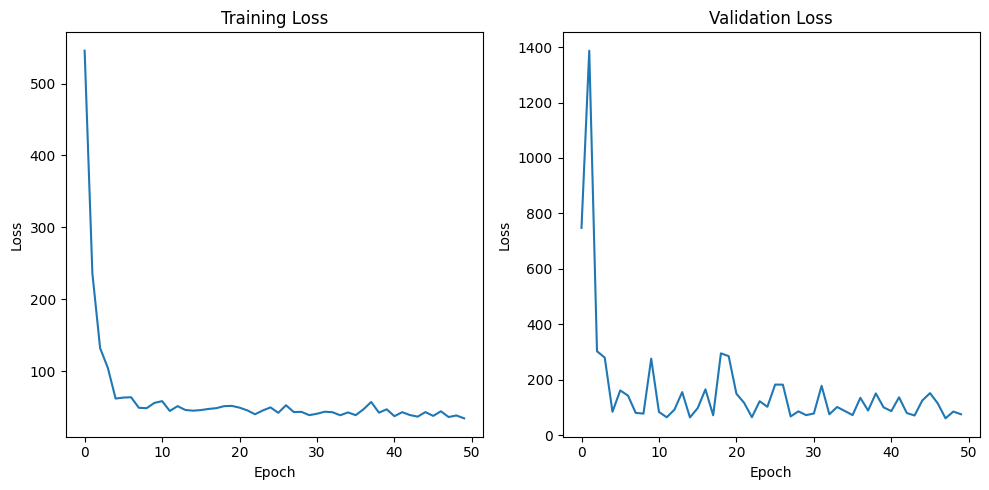

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

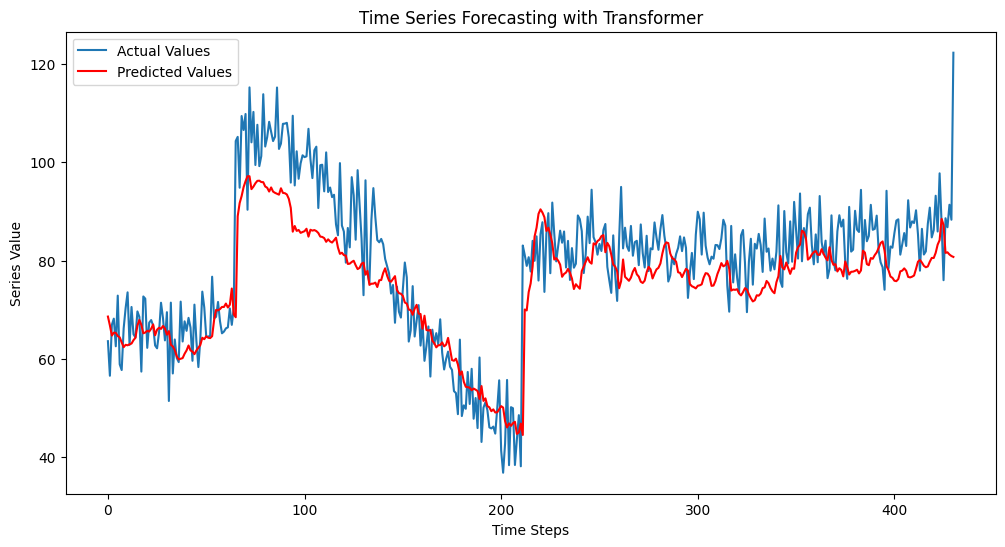

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, LayerNormalization, MultiHeadAttention, Dropout, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

class PositionalEncoding(Layer):
    """
    Positional Encoding layer for Transformer models
    """
    def __init__(self, max_len, embed_dim):
        super(PositionalEncoding, self).__init__()
        self.max_len = max_len
        self.embed_dim = embed_dim

    def build(self, input_shape):
        # Create positional encoding matrix
        position = np.arange(self.max_len)[:, np.newaxis]
        div_term = np.exp(np.arange(0, self.embed_dim, 2) * -(np.log(10000.0) / self.embed_dim))

        pos_encoding = np.zeros((self.max_len, self.embed_dim))
        pos_encoding[:, 0::2] = np.sin(position * div_term)
        pos_encoding[:, 1::2] = np.cos(position * div_term)

        self.pos_encoding = tf.constant(pos_encoding, dtype=tf.float32)
        super().build(input_shape)

    def call(self, inputs):
        # Get batch size and sequence length
        batch_size = tf.shape(inputs)[0]
        seq_len = tf.shape(inputs)[1]

        # Slice or tile positional encoding to match input shape
        pos_enc = self.pos_encoding[:seq_len, :]
        pos_enc = tf.tile(tf.expand_dims(pos_enc, 0), [batch_size, 1, 1])

        # Add positional encoding to the inputs
        return inputs + pos_enc

class TransformerBlock(Layer):
    """
    Transformer block with Multi-Head Attention and Feed-Forward layers
    """
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):  # Add default value for training
        # Multi-Head Attention
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        # Feed-Forward Network
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def prepare_transformer_dataset(series, window_size, forecast_horizon=1, batch_size=32):
    """
    Prepare dataset for Transformer model

    Args:
        series (np.array): Input time series data
        window_size (int): Size of input window
        forecast_horizon (int): Number of steps to predict
        batch_size (int): Batch size for training

    Returns:
        tf.data.Dataset: Prepared dataset
    """
    # Ensure series is 2D
    if series.ndim == 1:
        series = series.reshape(-1, 1)

    # Create sliding windows
    x, y = [], []
    for i in range(len(series) - window_size - forecast_horizon + 1):
        x.append(series[i:i+window_size])
        y.append(series[i+window_size:i+window_size+forecast_horizon])

    x = np.array(x)
    y = np.array(y)

    # Create TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

def create_transformer_model(window_size, forecast_horizon=1, embed_dim=64,
                              num_heads=4, ff_dim=32, num_transformer_blocks=2):
    """
    Create Transformer model for time series forecasting

    Args:
        window_size (int): Size of input window
        forecast_horizon (int): Number of steps to predict
        embed_dim (int): Embedding dimension
        num_heads (int): Number of attention heads
        ff_dim (int): Feed-forward layer dimension
        num_transformer_blocks (int): Number of transformer blocks

    Returns:
        tf.keras.Model: Compiled Transformer model
    """
    # Input layer
    inputs = Input(shape=(window_size, 1))

    # Embedding layer (optional: could use Conv1D for feature extraction)
    x = Dense(embed_dim)(inputs)

    # Positional Encoding
    x = PositionalEncoding(window_size, embed_dim)(x)

    # Transformer Blocks
    # Transformer Blocks
    for _ in range(num_transformer_blocks):
      x = TransformerBlock(embed_dim, num_heads, ff_dim)(x, training=True)  # Or False, depending on your needs

    # Flatten and Dense layers for prediction
    x = tf.keras.layers.Flatten()(x)
    x = Dense(ff_dim, activation='relu')(x)
    outputs = Dense(forecast_horizon)(x)

    # Create and compile model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    return model

def train_transformer_model(x_train, x_valid, window_size=30,
                             forecast_horizon=1, epochs=50, batch_size=32):
    """
    Train Transformer model

    Args:
        x_train (np.array): Training data
        x_valid (np.array): Validation data
        window_size (int): Size of input window
        forecast_horizon (int): Number of steps to predict
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training

    Returns:
        tuple: Trained model, training history
    """
    # Prepare datasets
    train_dataset = prepare_transformer_dataset(
        x_train, window_size, forecast_horizon, batch_size
    )
    valid_dataset = prepare_transformer_dataset(
        x_valid, window_size, forecast_horizon, batch_size
    )

    # Create model
    model = create_transformer_model(
        window_size,
        forecast_horizon=forecast_horizon
    )

    # Print model summary
    model.summary()

    # Train model
    history = model.fit(
        train_dataset,
        validation_data=valid_dataset,
        epochs=epochs,
        verbose=1
    )

    return model, history

def generate_transformer_predictions(x_valid, model, window_size, forecast_horizon=1):
    """
    Generate predictions using Transformer model

    Args:
        x_valid (np.array): Validation data
        model (tf.keras.Model): Trained model
        window_size (int): Size of input window
        forecast_horizon (int): Number of steps to predict

    Returns:
        np.array: Predicted values
    """
    # Ensure x_valid is 2D
    if x_valid.ndim == 1:
        x_valid = x_valid.reshape(-1, 1)

    # Prepare prediction inputs
    predictions = []

    # Generate predictions
    for i in range(len(x_valid) - window_size - forecast_horizon + 1):
        input_window = x_valid[i:i+window_size].reshape(1, window_size, 1)
        prediction = model.predict(input_window)
        predictions.append(prediction[0])

    return np.array(predictions)

def calculate_metrics(x_valid, predictions):
    """
    Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)

    Args:
        x_valid (np.array): Validation data
        predictions (np.array): Predicted values

    Returns:
        tuple: MSE and MAE values
    """
    # Ensure predictions match the shape for comparison
    x_valid_trimmed = x_valid[30:]  # Trim to match predictions length

    # Calculate MSE
    mse = np.mean((x_valid_trimmed - predictions) ** 2)

    # Calculate MAE
    mae = np.mean(np.abs(x_valid_trimmed - predictions))

    return mse, mae

def plot_predictions(x_valid, predictions):
    """
    Plot actual vs predicted values

    Args:
        x_valid (np.array): Validation data
        predictions (np.array): Predicted values
    """
    plt.figure(figsize=(12, 6))
    plt.plot(x_valid[30:], label='Actual Values')
    plt.plot(predictions, label='Predicted Values', color='red')
    plt.title('Time Series Forecasting with Transformer')
    plt.xlabel('Time Steps')
    plt.ylabel('Series Value')
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Assuming your previous synthetic data generation code is present
    # time, series, split_time, x_train, x_valid are defined

    window_size = 30
    forecast_horizon = 1

    # Train the Transformer model
    model, history = train_transformer_model(
        x_train, x_valid,
        window_size=window_size,
        forecast_horizon=forecast_horizon
    )

    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.show()

    # Generate predictions
    predictions = generate_transformer_predictions(
        x_valid, model, window_size, forecast_horizon
    )

    # Calculate and print metrics
    mse, mae = calculate_metrics(x_valid, predictions)
    print("Erreur MSE :", mse)
    print("Erreur MAE :", mae)

    # Plot predictions
    plot_predictions(x_valid, predictions)